In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean , std
import seaborn as sb 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("D:\\Lectures\\Majors\\cse 498\\Cse-498-Depression-Dataset-and-Code\\BDI_Scores.csv") ## dataset imported

In [3]:
def HyperParameterTune(clf, param_grid, x_train, y_train):
    grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
    grid.fit(x_train,y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)

In [4]:
def randomForestGridSearch(x_train, y_train):
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]# Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
    rf_random.fit(x_train, y_train)
    return (rf_random.best_estimator_)

In [5]:
df = df.drop(columns=['Email Address','BDI Score','Outcome'])
df.drop_duplicates(inplace=True) ## Duplicate data removed
df.shape

(468, 30)

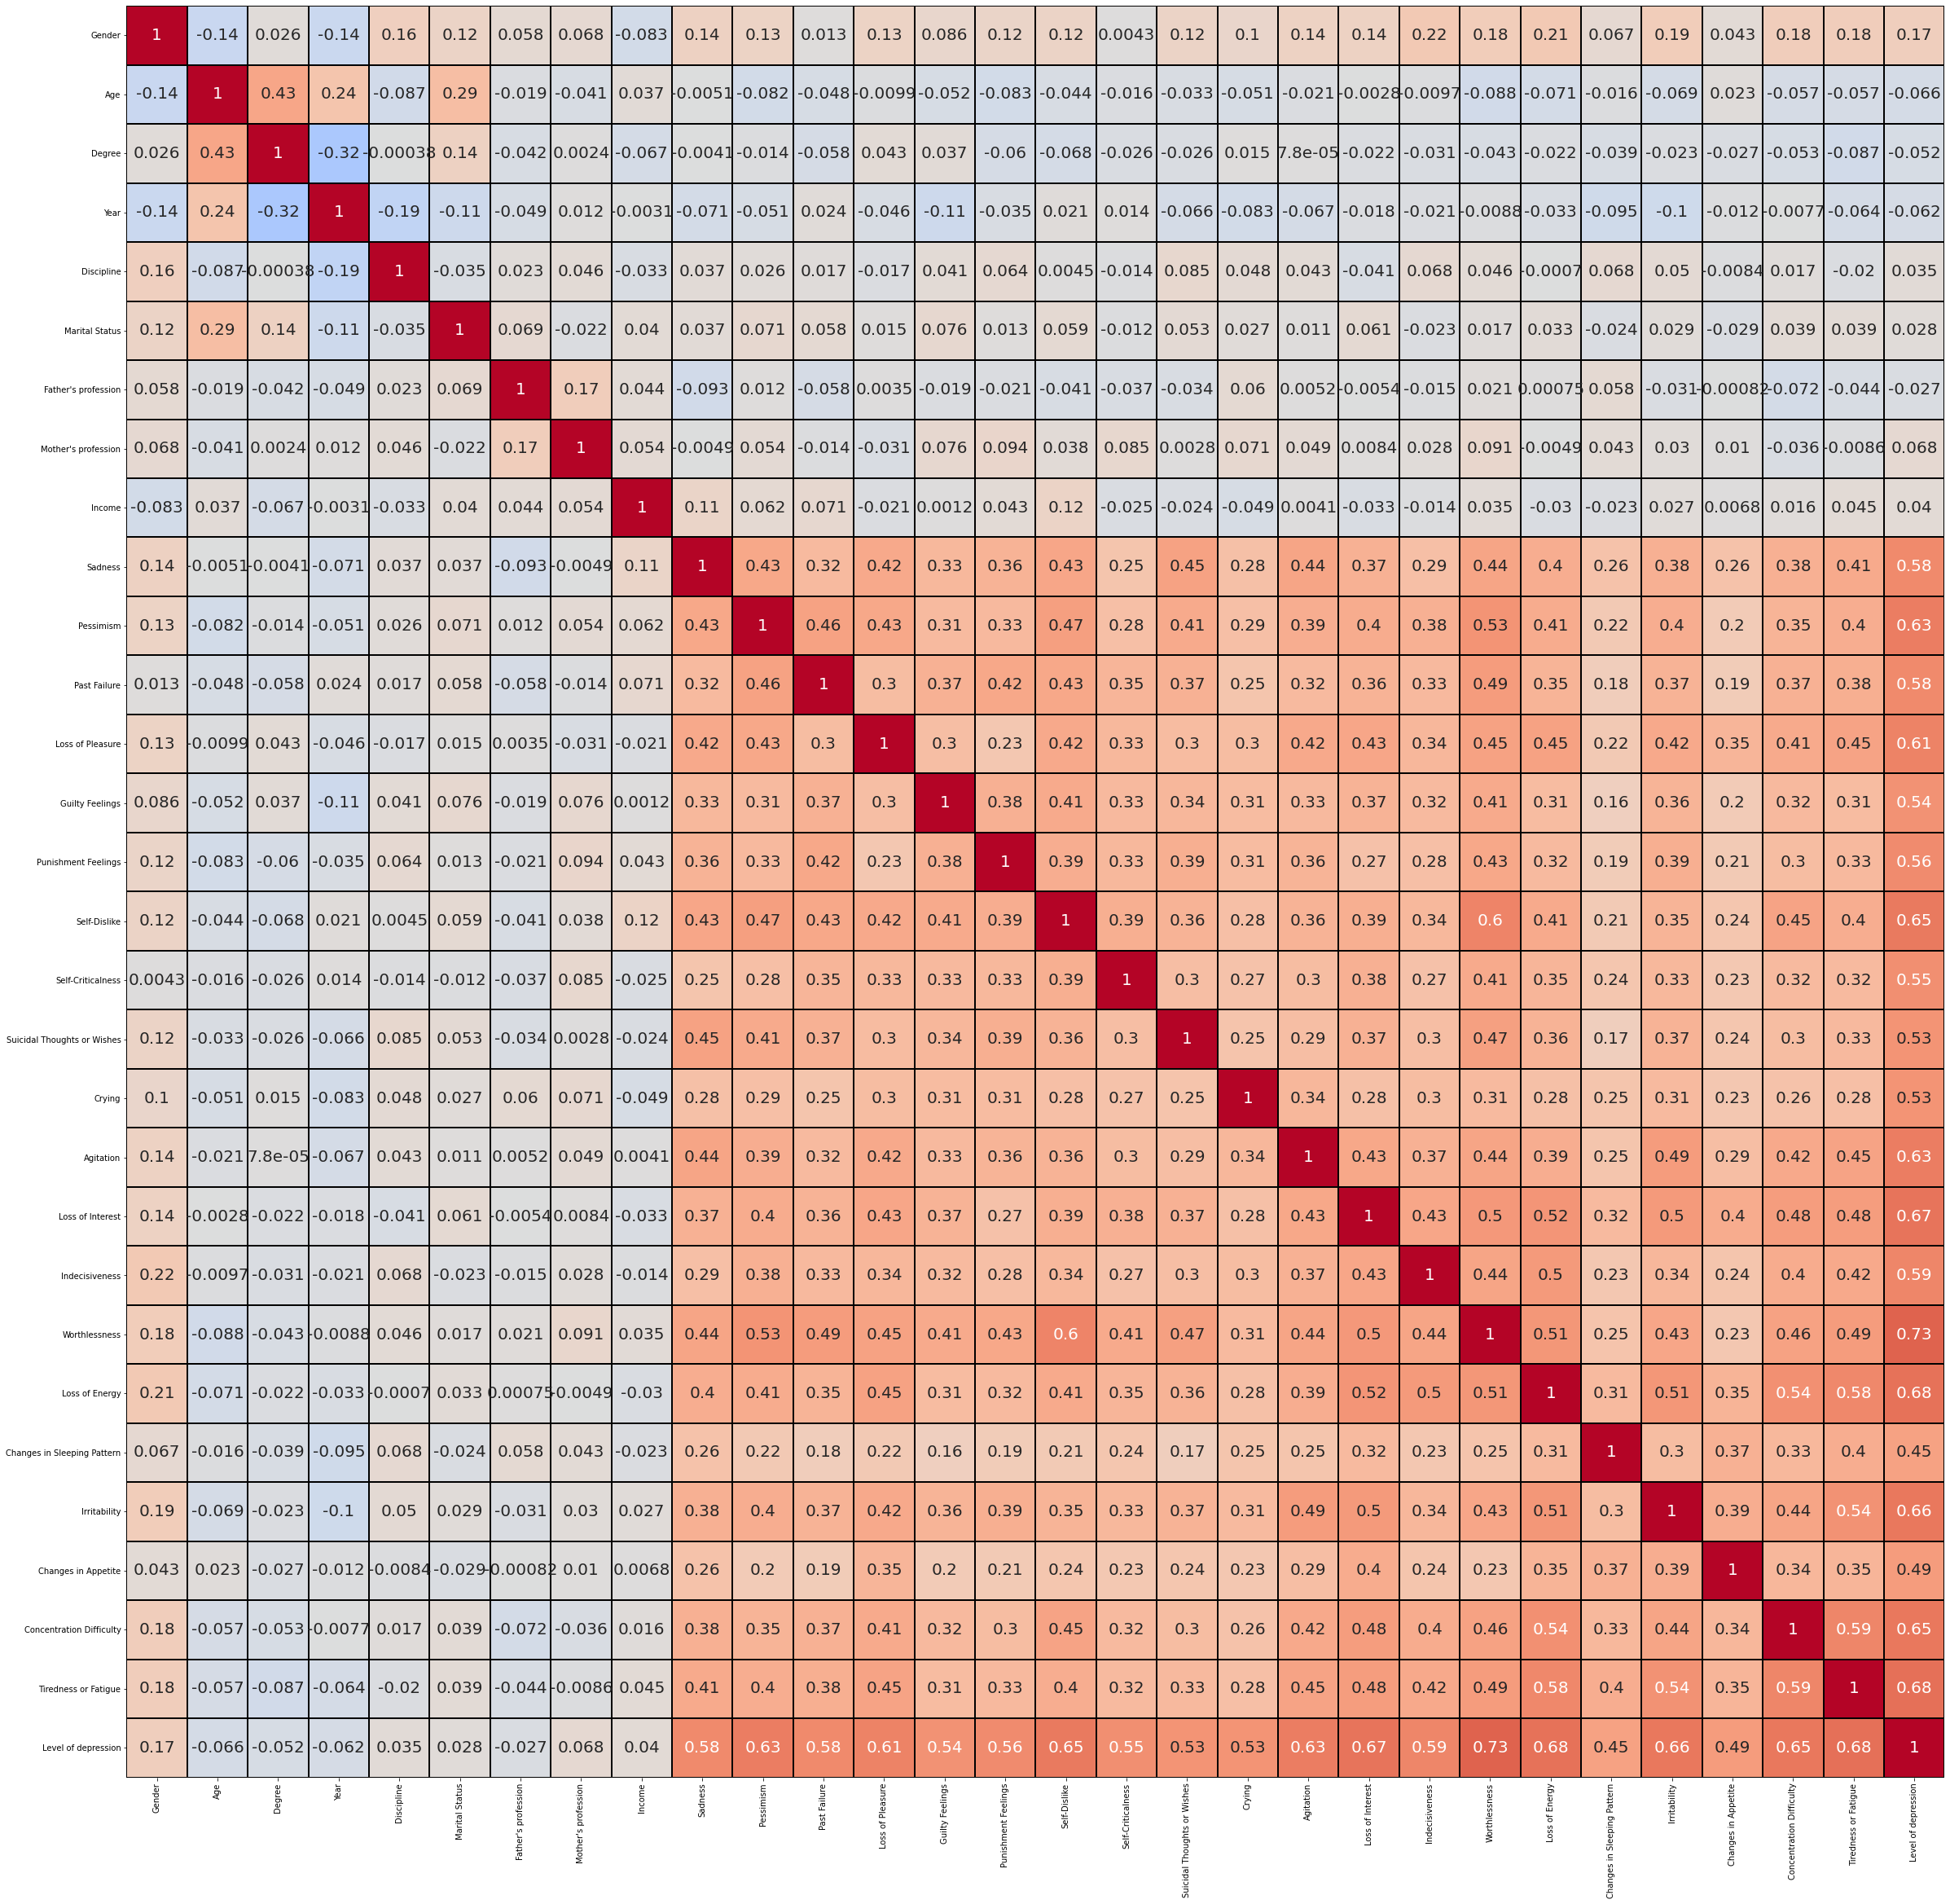

In [6]:
fig,ax = plt.subplots(figsize=(40,40))
dataplot = sb.heatmap(df.corr(),cmap="coolwarm", annot=True, fmt="0.2g",vmin= -1, vmax=1 , center=0 , linewidths=1, linecolor="black",ax= ax, annot_kws={'size': 20},cbar=False)

In [7]:
X = df.drop(columns=['Level of depression'])
y = df['Level of depression'] ### Dropping columns to store and X and storing the result column in y

# Cross Validation on whole Dataset

### Knn Classifier

In [8]:
cv = StratifiedKFold(n_splits=10,random_state=42 ,shuffle=True)

In [9]:
knn = KNeighborsClassifier()
neighbors = range(1,300)
param_grid = dict(n_neighbors=neighbors)
HyperParameterTune(knn, param_grid, X, y)

0.6432007400555042
{'n_neighbors': 10}
KNeighborsClassifier(n_neighbors=10)


In [10]:
knn_clf= KNeighborsClassifier(n_neighbors=10, metric='euclidean')
AccuracyKnn = cross_val_score(knn_clf, X, y, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionKnn = cross_val_score(knn_clf, X, y, scoring='precision_micro', cv=cv, n_jobs=1)
RecallKnn = cross_val_score(knn_clf, X, y, scoring='recall_micro', cv=cv, n_jobs=1)
F1Knn = cross_val_score(knn_clf, X, y, scoring='f1_micro', cv=cv, n_jobs=1)

print("Cross Validation Scores for Random Forest\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyKnn), std(AccuracyKnn)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionKnn), std(PrecisionKnn)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallKnn), std(RecallKnn)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Knn), std(F1Knn)))

Cross Validation Scores for Random Forest

Accuracy Score: 0.654 (0.061)
Precision Score: 0.654 (0.061)
Recall Score: 0.654 (0.061)
F1 Score: 0.654 (0.061)


#### Decision Tree

In [11]:
decision_clf = DecisionTreeClassifier()
maxDepth = range(1,300)
param_grid = dict(max_depth=maxDepth)
HyperParameterTune(decision_clf,param_grid, X, y)

0.5472247918593894
{'max_depth': 6}
DecisionTreeClassifier(max_depth=6)


In [12]:
decision_clf =DecisionTreeClassifier(criterion='gini',max_depth=6)
AccuracyDecision = cross_val_score(decision_clf, X, y, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionDecision = cross_val_score(decision_clf, X, y, scoring='precision_micro', cv=cv, n_jobs=1)
RecallDecision = cross_val_score(decision_clf, X, y, scoring='recall_micro', cv=cv, n_jobs=1)
F1Decision = cross_val_score(decision_clf, X, y, scoring='f1_micro', cv=cv, n_jobs=1)

print("Cross Validation Scores for Random Forest\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyDecision), std(AccuracyDecision)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionDecision), std(PrecisionDecision)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallDecision), std(RecallDecision)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Decision), std(F1Decision)))

Cross Validation Scores for Random Forest

Accuracy Score: 0.515 (0.055)
Precision Score: 0.506 (0.050)
Recall Score: 0.511 (0.051)
F1 Score: 0.513 (0.057)


### Random Forest

In [13]:
randomForestGridSearch(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_split=5, n_estimators=600)

In [14]:
random_clf = RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=5,n_estimators=800)
AccuracyRandom = cross_val_score(random_clf, X, y, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionRandom = cross_val_score(random_clf, X, y, scoring='precision_micro', cv=cv, n_jobs=1)
RecallRandom = cross_val_score(random_clf, X, y, scoring='recall_micro', cv=cv, n_jobs=1)
F1Random = cross_val_score(random_clf, X, y, scoring='f1_micro', cv=cv, n_jobs=1)

print("Cross Validation Scores for Random Forest\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyRandom), std(AccuracyRandom)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionRandom), std(PrecisionRandom)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallRandom), std(RecallRandom)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Random), std(F1Random)))

Cross Validation Scores for Random Forest

Accuracy Score: 0.716 (0.047)
Precision Score: 0.716 (0.051)
Recall Score: 0.731 (0.055)
F1 Score: 0.712 (0.049)


### Naive Bayes

In [15]:
naiveGauss_clf = GaussianNB()
AccuracyNaive = cross_val_score(naiveGauss_clf, X, y, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionNaive = cross_val_score(naiveGauss_clf, X, y, scoring='precision_macro', cv=cv, n_jobs=1)
RecallNaive = cross_val_score(naiveGauss_clf, X, y, scoring='recall_macro', cv=cv, n_jobs=1)
F1Naive = cross_val_score(naiveGauss_clf, X, y, scoring='f1_macro', cv=cv, n_jobs=1)

print("Cross Validation Scores for naive bayes\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyNaive), std(AccuracyNaive)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionNaive), std(PrecisionNaive)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallNaive), std(RecallNaive)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Naive), std(F1Naive)))

Cross Validation Scores for naive bayes

Accuracy Score: 0.701 (0.072)
Precision Score: 0.716 (0.081)
Recall Score: 0.664 (0.072)
F1 Score: 0.663 (0.080)
C:\Users\Sadman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [16]:
svm_clf = SVC()
maxC = range(1,300)
param_grid = dict(C = maxC)
HyperParameterTune(svm_clf,param_grid, X, y)

0.8803422756706754
{'C': 298}
SVC(C=298)


In [17]:
svc_clf = SVC(C= 298)
Accuracysvc = cross_val_score(naiveGauss_clf, X, y, scoring='accuracy', cv=cv, n_jobs=1)
Precisionsvc = cross_val_score(naiveGauss_clf, X, y, scoring='precision_macro', cv=cv, n_jobs=1)
Recallsvc = cross_val_score(naiveGauss_clf, X, y, scoring='recall_macro', cv=cv, n_jobs=1)
F1svc = cross_val_score(naiveGauss_clf, X, y, scoring='f1_macro', cv=cv, n_jobs=1)

print("Cross Validation Scores for naive bayes\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(Accuracysvc), std(Accuracysvc)))
print("Precision Score: %.3f (%.3f)" % (mean(Precisionsvc), std(Precisionsvc)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallNaive), std(Recallsvc)))
print("F1 Score: %.3f (%.3f)" % (mean(F1svc), std(F1svc)))

Cross Validation Scores for naive bayes

Accuracy Score: 0.701 (0.072)
Precision Score: 0.716 (0.081)
Recall Score: 0.664 (0.072)
F1 Score: 0.663 (0.080)
C:\Users\Sadman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying train test split (various algorithm parameters are collected from previous section)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Accuracy:  0.6871657754010695
Test Accuracy:  0.6595744680851063
Precision Score:  0.5594411860540892
Recall Score:  0.5583213887561714
F1 Score:  0.5489245125392098


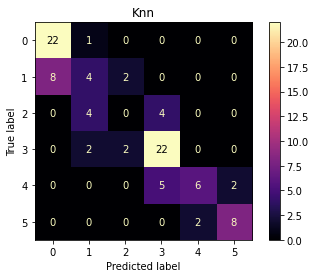

In [19]:
knn_clf.fit(X_train,y_train)
y_predKnn = knn_clf.predict(X_test)
print("Training Accuracy: ",knn_clf.score(X_train,y_train))
print("Test Accuracy: ",knn_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predKnn, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predKnn, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predKnn, average='macro'))
plot_confusion_matrix(knn_clf,X_test,y_test,cmap='magma',)
plt.title("Knn")
plt.show()

Training Accuracy:  0.7967914438502673
Test Accuracy:  0.5957446808510638
Precision Score:  0.6127136752136751
Recall Score:  0.5545409300844084
F1 Score:  0.5586139169472503


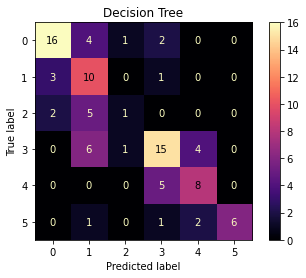

In [20]:
decision_clf.fit(X_train,y_train)
y_predDeci = decision_clf.predict(X_test)
print("Training Accuracy: ",decision_clf.score(X_train,y_train))
print("Test Accuracy: ",decision_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predDeci, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predDeci, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predDeci, average='macro'))
plot_confusion_matrix(decision_clf,X_test,y_test,cmap='magma',)
plt.title("Decision Tree")
plt.show()

Training Accuracy:  0.9973262032085561
Test Accuracy:  0.7872340425531915
Precision Score:  0.6740460157126824
Recall Score:  0.693956043956044
F1 Score:  0.6800020165355919
C:\Users\Sadman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


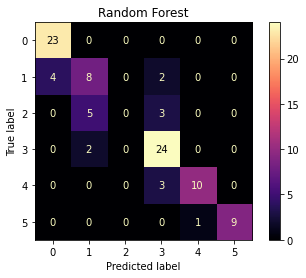

In [21]:
random_clf.fit(X_train,y_train) 
y_predRandom = random_clf.predict(X_test) 
print("Training Accuracy: ",random_clf.score(X_train,y_train)) 
print("Test Accuracy: ",random_clf.score(X_test,y_test)) 
print("Precision Score: ",precision_score(y_test,y_predRandom, average='macro')) 
print("Recall Score: ",recall_score(y_test,y_predRandom, average='macro')) 
print("F1 Score: ",f1_score(y_test,y_predRandom, average='macro'))
plot_confusion_matrix(random_clf,X_test,y_test,cmap='magma',)
plt.title("Random Forest")
plt.show()

Training Accuracy:  0.5508021390374331
Test Accuracy:  0.5638297872340425
Precision Score:  0.44829244829244824
Recall Score:  0.3875457875457875
F1 Score:  0.33399380981634225
C:\Users\Sadman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


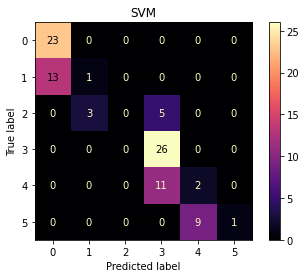

In [22]:
svm_clf.fit(X_train,y_train)
y_predSVM = svm_clf.predict(X_test)
print("Training Accuracy: ",svm_clf.score(X_train,y_train))
print("Test Accuracy: ",svm_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predSVM, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predSVM, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predSVM, average='macro'))
plot_confusion_matrix(svm_clf,X_test,y_test,cmap='magma',)
plt.title("SVM")
plt.show()

Training Accuracy:  0.8315508021390374
Test Accuracy:  0.7659574468085106
Precision Score:  0.7529699248120302
Recall Score:  0.7478559483994268
F1 Score:  0.7447917178567333


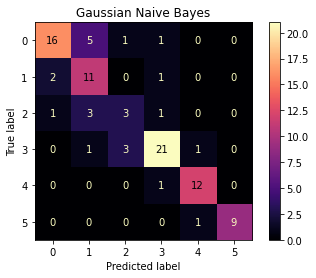

In [23]:
naiveGauss_clf.fit(X_train,y_train)
y_predNaiveGauss = naiveGauss_clf.predict(X_test)
print("Training Accuracy: ",naiveGauss_clf.score(X_train,y_train))
print("Test Accuracy: ",naiveGauss_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predNaiveGauss, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predNaiveGauss, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predNaiveGauss, average='macro'))
plot_confusion_matrix(naiveGauss_clf,X_test,y_test,cmap='magma',)
plt.title("Gaussian Naive Bayes")
plt.show()

# Oversampling

In [24]:
smote = SMOTE(random_state=2)
X_New, y_New = smote.fit_resample(X,y.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_New.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_New.shape))
#oversampling done and classes are now balanced.

After OverSampling, the shape of train_X: (768, 29)
After OverSampling, the shape of train_y: (768,) 



# Cross Validate

In [25]:
knn = KNeighborsClassifier()
neighbors = range(1,300)
param_grid = dict(n_neighbors=neighbors)
HyperParameterTune(knn, param_grid, X_New, y_New)

0.8490601503759398
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [26]:
knn_clf= KNeighborsClassifier(n_neighbors=1, metric='euclidean')
AccuracyKnn = cross_val_score(knn_clf, X_New, y_New, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionKnn = cross_val_score(knn_clf, X_New, y_New, scoring='precision_micro', cv=cv, n_jobs=1)
RecallKnn = cross_val_score(knn_clf, X_New, y_New,scoring='recall_micro', cv=cv, n_jobs=1)
F1Knn = cross_val_score(knn_clf, X_New, y_New,scoring='f1_micro', cv=cv, n_jobs=1)

print("Cross Validation Scores for Random Forest\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyKnn), std(AccuracyKnn)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionKnn), std(PrecisionKnn)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallKnn), std(RecallKnn)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Knn), std(F1Knn)))

Cross Validation Scores for Random Forest

Accuracy Score: 0.833 (0.027)
Precision Score: 0.833 (0.027)
Recall Score: 0.833 (0.027)
F1 Score: 0.833 (0.027)


### Decision Tree

In [27]:
decision_clf = DecisionTreeClassifier()
maxDepth = range(1,300)
param_grid = dict(max_depth=maxDepth)
HyperParameterTune(decision_clf,param_grid, X_New, y_New)

0.6968899521531101
{'max_depth': 176}
DecisionTreeClassifier(max_depth=176)


In [28]:
decision_clf =DecisionTreeClassifier(criterion='gini',max_depth=176)
AccuracyDecision = cross_val_score(decision_clf, X_New, y_New, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionDecision = cross_val_score(decision_clf, X_New, y_New, scoring='precision_micro', cv=cv, n_jobs=1)
RecallDecision = cross_val_score(decision_clf, X_New, y_New, scoring='recall_micro', cv=cv, n_jobs=1)
F1Decision = cross_val_score(decision_clf,  X_New, y_New, scoring='f1_micro', cv=cv, n_jobs=1)

print("Cross Validation Scores for Random Forest\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyDecision), std(AccuracyDecision)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionDecision), std(PrecisionDecision)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallDecision), std(RecallDecision)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Decision), std(F1Decision)))

Cross Validation Scores for Random Forest

Accuracy Score: 0.692 (0.058)
Precision Score: 0.672 (0.045)
Recall Score: 0.677 (0.059)
F1 Score: 0.677 (0.058)


### Random Forest

In [32]:
randomForestGridSearch(X_New,y_New)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

In [33]:
random_clf = RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)
AccuracyRandom = cross_val_score(random_clf, X_New, y_New, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionRandom = cross_val_score(random_clf, X_New, y_New, scoring='precision_micro', cv=cv, n_jobs=1)
RecallRandom = cross_val_score(random_clf, X_New, y_New, scoring='recall_micro', cv=cv, n_jobs=1)
F1Random = cross_val_score(random_clf, X_New, y_New, scoring='f1_micro', cv=cv, n_jobs=1)

print("Cross Validation Scores for Random Forest\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyRandom), std(AccuracyRandom)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionRandom), std(PrecisionRandom)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallRandom), std(RecallRandom)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Random), std(F1Random)))

Cross Validation Scores for Random Forest

Accuracy Score: 0.858 (0.038)
Precision Score: 0.856 (0.033)
Recall Score: 0.854 (0.035)
F1 Score: 0.853 (0.035)


### SVM

In [29]:
svm_clf = SVC()
maxC = range(1,300)
param_grid = dict(C = maxC)
HyperParameterTune(svm_clf,param_grid, X_New, y_New)

0.7761619958988379
{'C': 265}
SVC(C=265)


In [30]:
svc_clf = SVC(C= 265)
Accuracysvc = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='accuracy', cv=cv, n_jobs=1)
Precisionsvc = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='precision_macro', cv=cv, n_jobs=1)
Recallsvc = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='recall_macro', cv=cv, n_jobs=1)
F1svc = cross_val_score(naiveGauss_clf, X_New, y_New,scoring='f1_macro', cv=cv, n_jobs=1)

print("Cross Validation Scores for naive bayes\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(Accuracysvc), std(Accuracysvc)))
print("Precision Score: %.3f (%.3f)" % (mean(Precisionsvc), std(Precisionsvc)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallNaive), std(Recallsvc)))
print("F1 Score: %.3f (%.3f)" % (mean(F1svc), std(F1svc)))

Cross Validation Scores for naive bayes

Accuracy Score: 0.669 (0.057)
Precision Score: 0.692 (0.065)
Recall Score: 0.664 (0.058)
F1 Score: 0.666 (0.071)
C:\Users\Sadman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [31]:
naiveGauss_clf = GaussianNB()
AccuracyNaive = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='accuracy', cv=cv, n_jobs=1)
PrecisionNaive = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='precision_macro', cv=cv, n_jobs=1)
RecallNaive = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='recall_macro', cv=cv, n_jobs=1)
F1Naive = cross_val_score(naiveGauss_clf, X_New, y_New, scoring='f1_macro', cv=cv, n_jobs=1)

print("Cross Validation Scores for naive bayes\n")
print("Accuracy Score: %.3f (%.3f)" % (mean(AccuracyNaive), std(AccuracyNaive)))
print("Precision Score: %.3f (%.3f)" % (mean(PrecisionNaive), std(PrecisionNaive)))
print("Recall Score: %.3f (%.3f)" % (mean(RecallNaive), std(RecallNaive)))
print("F1 Score: %.3f (%.3f)" % (mean(F1Naive), std(F1Naive)))

C:\Users\Sadman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Cross Validation Scores for naive bayes

Accuracy Score: 0.669 (0.057)
Precision Score: 0.692 (0.065)
Recall Score: 0.669 (0.058)
F1 Score: 0.666 (0.071)


# Oversample + train test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_New, y_New, test_size=0.2, random_state=42)

Training Accuracy:  1.0
Test Accuracy:  0.8051948051948052
Precision Score:  0.8061162044639056
Recall Score:  0.8085565802957108
F1 Score:  0.7971041702224498


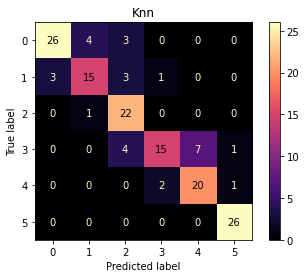

In [35]:
knn_clf.fit(X_train,y_train)
y_predKnn = knn_clf.predict(X_test)
print("Training Accuracy: ",knn_clf.score(X_train,y_train))
print("Test Accuracy: ",knn_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predKnn, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predKnn, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predKnn, average='macro'))
plot_confusion_matrix(knn_clf,X_test,y_test,cmap='magma',)
plt.title("Knn")
plt.show()

Training Accuracy:  1.0
Test Accuracy:  0.6623376623376623
Precision Score:  0.6652307037364508
Recall Score:  0.6629899890769456
F1 Score:  0.657143838489494


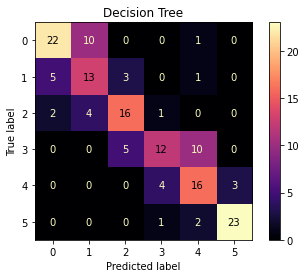

In [38]:
decision_clf.fit(X_train,y_train)
y_predDeci = decision_clf.predict(X_test)
print("Training Accuracy: ",decision_clf.score(X_train,y_train))
print("Test Accuracy: ",decision_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predDeci, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predDeci, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predDeci, average='macro'))
plot_confusion_matrix(decision_clf,X_test,y_test,cmap='magma',)
plt.title("Decision Tree")
plt.show()

Training Accuracy:  1.0
Test Accuracy:  0.8571428571428571
Precision Score:  0.8569251813758592
Recall Score:  0.8589218081971706
F1 Score:  0.8559806915200681


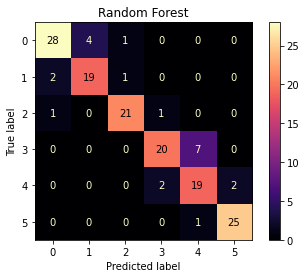

In [37]:
random_clf.fit(X_train,y_train) 
y_predRandom = random_clf.predict(X_test) 
print("Training Accuracy: ",random_clf.score(X_train,y_train)) 
print("Test Accuracy: ",random_clf.score(X_test,y_test)) 
print("Precision Score: ",precision_score(y_test,y_predRandom, average='macro')) 
print("Recall Score: ",recall_score(y_test,y_predRandom, average='macro')) 
print("F1 Score: ",f1_score(y_test,y_predRandom, average='macro'))
plot_confusion_matrix(random_clf,X_test,y_test,cmap='magma',)
plt.title("Random Forest")
plt.show()

Training Accuracy:  0.752442996742671
Test Accuracy:  0.6623376623376623
Precision Score:  0.7223091493766794
Recall Score:  0.667114286679504
F1 Score:  0.659421632644139


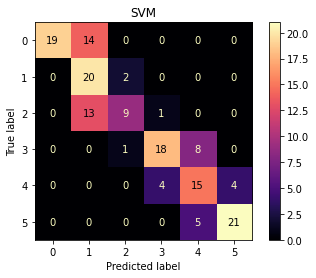

In [36]:
svm_clf.fit(X_train,y_train)
y_predSVM = svm_clf.predict(X_test)
print("Training Accuracy: ",svm_clf.score(X_train,y_train))
print("Test Accuracy: ",svm_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predSVM, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predSVM, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predSVM, average='macro'))
plot_confusion_matrix(svm_clf,X_test,y_test,cmap='magma',)
plt.title("SVM")
plt.show()

Training Accuracy:  0.760586319218241
Test Accuracy:  0.6493506493506493
Precision Score:  0.6546554291551955
Recall Score:  0.6446497678381736
F1 Score:  0.6446332389360876


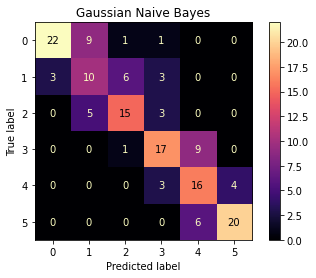

In [39]:
naiveGauss_clf.fit(X_train,y_train)
y_predNaiveGauss = naiveGauss_clf.predict(X_test)
print("Training Accuracy: ",naiveGauss_clf.score(X_train,y_train))
print("Test Accuracy: ",naiveGauss_clf.score(X_test,y_test))
print("Precision Score: ",precision_score(y_test,y_predNaiveGauss, average='macro'))
print("Recall Score: ",recall_score(y_test,y_predNaiveGauss, average='macro'))
print("F1 Score: ",f1_score(y_test,y_predNaiveGauss, average='macro'))
plot_confusion_matrix(naiveGauss_clf,X_test,y_test,cmap='magma',)
plt.title("Gaussian Naive Bayes")
plt.show()